[14.19886596]


/Users/christianrglatz/opt/anaconda3/lib/python3.8/site-packages/ddeint/ddeint.py:145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([g(tt[0])] + results)


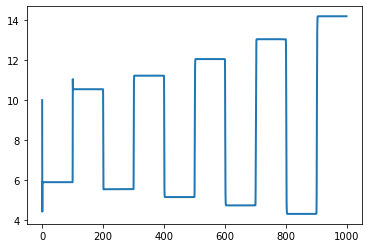

In [11]:
import numpy as np
from ddeint import ddeint
from pylab import *

 
theta = 10      # mid-range pupil size
Lambda_max = 30 # maximum pupil size
Lambda_min = 0  # minimum pupil size
n = 10           # Hill coefficient
gamma = 5       # gamma
alpha = 3     # alpha
I = 100         # constant for lumens
phi_th = 1     # threshold value for illuminance
d = 100         # time delay
start = 10      # value for A on the interval (-d,0)

# g(A) = theta*pow((Lambda_max+Lambda_min-A(t))/(A(t)-Lambda_min),1/n)
# dg/dA = -((theta*Lambda_max)/n)*pow((Lambda_max+Lambda_min-A(t))/(A(t)-Lambda_min),(1-n)/n)*pow((A(t)-Lambda_min),-2)

model = lambda A,t :  (1/(-((theta*Lambda_max)/n)*pow((Lambda_max+Lambda_min-A(t))/(A(t)-Lambda_min),(1-n)/n)*pow((A(t)-Lambda_min),-2)))*((gamma*np.log((I*A(t-d))/phi_th))-alpha*theta*pow((Lambda_max+Lambda_min-A(t))/(A(t)-Lambda_min),1/n))
g = lambda t:start
 

tt = linspace(0,1000,10000)
yy = ddeint(model,g,tt)
 

plot(tt,yy,lw=2)
A_eq = yy[9999]
print(A_eq)
dA_eq = -((theta*Lambda_max)/n)*pow((Lambda_max+Lambda_min-A_eq)/(A_eq-Lambda_min),(1-n)/n)*pow((A_eq-Lambda_min),-2)

